# Assignment 2 - Logistic Regression
> **FULL MARKS = 10**

In this assignment, you are going to implement your own logistic Regression function. Please notice **no** library versions of logistic regression are allowed. Follow the instructions, you will need to fill the blanks to make it functional. The process is similar to the previous assignment. 

***Initialization***

*No more library allowed*

In [1]:
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import scipy.optimize as opt

Load data *(Do not modify)*
_________

We use 100 samples and 2 features. 


In [2]:
x, y = load_iris(return_X_y=True)

In [3]:
x=x[:100, :2] # class 0 and 1 balanced
y=y[:100]

In [4]:
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

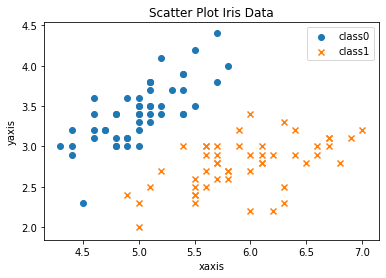

In [6]:
plt.scatter(x[:50,0],x[:50,1],label='class0')
plt.scatter(x[50:,0],x[50:,1],marker= 'x',label='class1')
plt.title('Scatter Plot Iris Data')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.legend(loc='best')

**Visualize data**
___________

In [9]:
# draw raw data
def draw_data(x,y):
    
    #########################################################################
    # Full Mark: 1                                                          #    
    # TODO:                                                                 #
    # 1. make a scatter plot of the raw data                                #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################
    plt.figure(figsize=(6,6))
    plt.scatter(x[:50,0],x[:50,1],marker='x',color='r',label='class0')
    plt.scatter(x[50:,0],x[50:,1],label='class1',color='b')

    plt.title('Scatter Plot Iris Data')
    plt.xlabel('xaxis')
    plt.ylabel('yaxis')
    plt.legend(['Label 0', 'Label 1'],loc='best')
    #plt.legend(loc='best')
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()

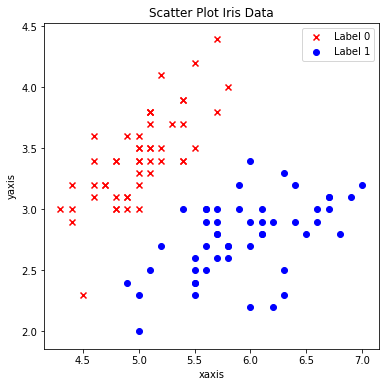

In [10]:
draw_data(x,y)

Your plot should be similar to the example below

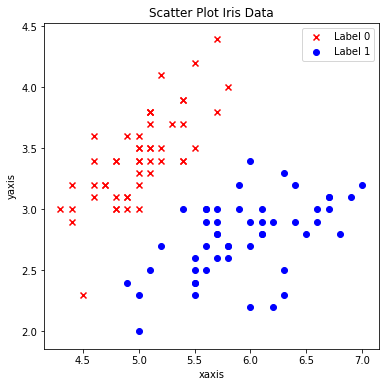

In [11]:
draw_data(x,y)

**Sigmoid function**
________________

In [12]:
# please do not modify this cell
x = np.concatenate((np.array([np.ones(len(y))]).T, x), axis=1)
theta = np.zeros(x.shape[1])



**You can decide by yourselves whether to split the dataset to training and testing. The training and testing datasets spliting is not a part of the assignment 2 as you have done that in assignmnet 1. Without spliting, you can just report the accuracy on training dataset. **

In [13]:
# define sigmoid function
# math: refer to https://en.wikipedia.org/wiki/Sigmoid_function or slides
def sigmoid(theta, X):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. implement the sigmoid function over input theta and X
    #########################################################################
    dotProduct=np.dot(X,theta)
    s = 1/(1+np.exp(-dotProduct))
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    
    return s

**Cost function**
____________

In [14]:
# define cost function with sigmoid function
def cost(theta, X, y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. implement the cross entropy loss function with sigmoid             #
    #########################################################################
    sig=sigmoid(theta,X)
    n=X.shape[0]
    co = -(1/n)*np.sum(y*np.log(sig) + (1-y)*np.log(1-sig))
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return co

**Calculate gradients**
________________

In [15]:
# the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)
def gradient(theta, X, y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. calculate the gradients using theta and sigmoid                    #
    # Hint: X may need to be transposed to do matrix operation              #
    #########################################################################
    n=X.shape[0]
    sig=sigmoid(theta,X)
    grad = (1/n)*np.dot(X.T,(sig-y))
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return grad

**Predicting**
________________

In [16]:
# predict for new X
def predict(theta, X):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. predict the value using theta and sigmoid                          #
    # 2. convert the predicted value to 0/1                                 #
    # That's how it is called Logistic regression                           #
    #########################################################################
    h = sigmoid(theta, X)
    labels=[]
    for i in h:
        if i>=0.5:
            labels.append(1)
        else:
            labels.append(0)
    predict_labels = labels
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    return predict_labels

**Calculate accuracy**
________________

In [17]:
# calculate accuracy
def accurate(predictions, y):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. calculate the accuracy value                                       #
    # Note that you coud not import extra library                           #
    #########################################################################
    correctlyClassified = 0
    for i in range(0, len(predictions)):
        if predictions[i] == y[i]:
            correctlyClassified += 1
    accuracy_score = correctlyClassified/len(y)
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return accuracy_score

**Calling functions**
________

In [18]:
# please do not modify this cell
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x, y))
final_theta = result[0]
final_cost = cost(final_theta, x, y)
predictions = predict(final_theta, x)
accuracy = accurate(predictions, y)
print("final cost is " + str(final_cost))
print("accuracy is " + str(accuracy))

final cost is 0.05171662351489702
accuracy is 0.99


C:\Users\venka\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\venka\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


In [19]:
final_theta

array([-2.06867854,  5.37100885, -8.72280792])

**Decsion boudary** 

In [20]:
# draw decision boudary
def draw_decision_boudary(final_theta,x,y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. plot the decision boudary on the raw data                          #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################
    x0 = np.array([np.min(x), np.max(x)])
    y0 = (-final_theta[1]/final_theta[2]) * x0 + (-final_theta[0]/final_theta[2])
    plt.scatter(x[y == 0][:, 1], x[y == 0][:, 2], color='b', marker = 'o')
    plt.scatter(x[y == 1][:, 1], x[y == 1][:, 2], color='r', marker = 'x')
    plt.legend(['Label 0', 'Label 1'], loc = 'best')
    plt.plot(x0,y0)
    plt.title('Iris Data')
    plt.xlabel('feature')
    plt.ylabel('target')
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()

Your plot should be similar to the example below

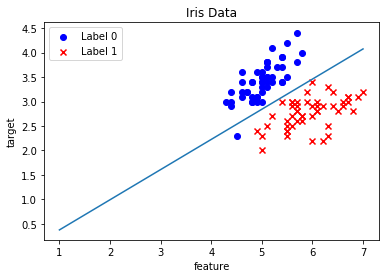

In [21]:
draw_decision_boudary(final_theta,x,y)